In [1]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pymongo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Data Extraction

In [3]:
from pymongo import MongoClient
import requests
import pandas as pd
client=MongoClient("mongodb://%s:%s@127.0.0.1" % ("dap", "dap"))
def fetch_data():
    url='https://data.cityofchicago.org/resource/2ani-ic5x.json?$limit=9301' #API endpoint
    response=requests.get(url) #get request to url 
    if response.status_code==200: #indicates successful response
        data=response.json() #convert to json format
        return data
    else: #unsucessful response
        print('Failed to Fetch Data:', response.status_code)
        return None
data=fetch_data() #calls the function fetch_data and stores the returned json data to data
db=client['project_database'] #connecting to MongoDB database 
collection=db['collection3'] #connecting to MongoDB collection 
if "collection" in db.list_collection_names(): #checks if collection already exists
  print("This Collection Already Exists")
else:
  collection.insert_many(data) #else insert json data into MongoDB collection
  print("Data Successfully Inserted")

Data Successfully Inserted


In [4]:
cursor=collection.find({}) #retrieves data from MongoDB collection
df=pd.DataFrame(list(cursor)) #converts cursor into pandas DataFrame

# Analysis of Data

To print the first 5 rows of data

In [5]:
df.head()

,_id,zip,week_end,season,measure,age,population,count,percent,zip_code_centroid,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_8hcu_yrd4
0,66264790f95b89d5bbfe4fb6,60628,2023-09-23T00:00:00.000,2023-2024,UpToDate_2023_2024,0-17 yrs,13786,3,0.000,"{'type': 'Point', 'coordinates': [-87.621537, ...",19,45,21861,237,11
1,66264790f95b89d5bbfe4fb7,60624,2023-09-30T00:00:00.000,2023-2024,UpToDate_2023_2024,0-17 yrs,10082,1,0.000,"{'type': 'Point', 'coordinates': [-87.722735, ...",30,27,21572,736,28
2,66264790f95b89d5bbfe4fb8,60645,2023-09-16T00:00:00.000,2023-2024,UpToDate_2023_2024,18+ yrs,36081,23,0.001,"{'type': 'Point', 'coordinates': [-87.695049, ...",12,20,22528,42,50
3,66264790f95b89d5bbfe4fb9,60628,2023-09-16T00:00:00.000,2023-2024,UpToDate_2023_2024,All Ages,62832,0,0.000,"{'type': 'Point', 'coordinates': [-87.621537, ...",19,45,21861,237,11
4,66264790f95b89d5bbfe4fba,60606,2023-09-16T00:00:00.000,2023-2024,UpToDate_2023_2024,18+ yrs,3624,7,0.002,"{'type': 'Point', 'coordinates': [-87.63676, 4...",46,38,14914,92,42


To print the last 5 rows of data

In [6]:
df.tail()

,_id,zip,week_end,season,measure,age,population,count,percent,zip_code_centroid,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_8hcu_yrd4
9295,66264790f95b89d5bbfe7405,60634,2024-04-13T00:00:00.000,2023-2024,UpToDate_2023_2024,18+ yrs,60436,8106,0.134,"{'type': 'Point', 'coordinates': [-87.797373, ...",52,17,22254,396,38
9296,66264790f95b89d5bbfe7406,60611,2024-03-16T00:00:00.000,2023-2024,UpToDate_2023_2024,18-64 yrs,28052,5744,0.205,"{'type': 'Point', 'coordinates': [-87.620291, ...",6,37,21182,158,2
9297,66264790f95b89d5bbfe7407,60619,2024-01-13T00:00:00.000,2023-2024,UpToDate_2023_2024,18-64 yrs,39250,2432,0.062,"{'type': 'Point', 'coordinates': [-87.60569, 4...",61,40,21546,140,4
9298,66264790f95b89d5bbfe7408,60642,2023-12-16T00:00:00.000,2023-2024,UpToDate_2023_2024,18-64 yrs,18062,2684,0.149,"{'type': 'Point', 'coordinates': [-87.657821, ...",49,25,22620,109,27
9299,66264790f95b89d5bbfe7409,60607,2023-11-18T00:00:00.000,2023-2024,UpToDate_2023_2024,18-64 yrs,26365,3173,0.12,"{'type': 'Point', 'coordinates': [-87.652727, ...",44,29,14917,87,34


To get the summary of the dataset

In [7]:
df.describe(include='all')

,_id,zip,week_end,season,measure,age,population,count,percent,zip_code_centroid,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_8hcu_yrd4
count,9300,9300,9300,9300,9300,9300,8990,9300,8990,9145,8835,8835,9145,8835,8835
unique,9300,60,31,1,1,5,288,5009,637,59,57,44,59,55,38
top,66264790f95b89d5bbfe4fb6,60628,2023-09-23T00:00:00.000,2023-2024,UpToDate_2023_2024,0-17 yrs,10082,0,0.000,"{'type': 'Point', 'coordinates': [-87.621537, ...",19,38,21861,92,34
freq,1,155,300,9300,9300,1860,62,118,183,155,155,930,155,465,620


To check for missing values

In [8]:
df.isnull()

,_id,zip,week_end,season,measure,age,population,count,percent,zip_code_centroid,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_8hcu_yrd4
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9295,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9296,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9297,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9298,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
null_values=df.isnull().any(axis=1) #to identify rows with null values
null_rows=df[null_values] #to get the rows with null values
print(null_rows)

                           _id    zip                 week_end     season  \
7     66264790f95b89d5bbfe4fbd  60707  2023-09-23T00:00:00.000  2023-2024   
9     66264790f95b89d5bbfe4fbf  60827  2023-10-21T00:00:00.000  2023-2024   
13    66264790f95b89d5bbfe4fc3  60827  2023-09-16T00:00:00.000  2023-2024   
15    66264790f95b89d5bbfe4fc5  60827  2023-10-14T00:00:00.000  2023-2024   
19    66264790f95b89d5bbfe4fc9  60827  2023-09-23T00:00:00.000  2023-2024   
...                        ...    ...                      ...        ...   
9245  66264790f95b89d5bbfe73d3  60707  2024-03-02T00:00:00.000  2023-2024   
9258  66264790f95b89d5bbfe73e0  60707  2024-03-02T00:00:00.000  2023-2024   
9264  66264790f95b89d5bbfe73e6  60707  2023-12-09T00:00:00.000  2023-2024   
9266  66264790f95b89d5bbfe73e8  60827  2023-12-02T00:00:00.000  2023-2024   
9268  66264790f95b89d5bbfe73ea  60707  2023-11-18T00:00:00.000  2023-2024   

                 measure        age population count percent  \
7     UpToD

In [10]:
df.isnull().sum() #to get the count of null values in each column

_id                              0
zip                              0
week_end                         0
season                           0
measure                          0
age                              0
population                     310
count                            0
percent                        310
zip_code_centroid              155
:@computed_region_rpca_8um6    465
:@computed_region_vrxf_vc4k    465
:@computed_region_6mkv_f3dw    155
:@computed_region_bdys_3d7i    465
:@computed_region_8hcu_yrd4    465
dtype: int64

# Preprocessing

Dropping unwanted columns

In [11]:
unwanted=['_id', 'week_end', 'measure', 'zip_code_centroid']
df.drop(columns=unwanted, inplace=True)

In [12]:
df

,zip,season,age,population,count,percent,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_8hcu_yrd4
0,60628,2023-2024,0-17 yrs,13786,3,0.000,19,45,21861,237,11
1,60624,2023-2024,0-17 yrs,10082,1,0.000,30,27,21572,736,28
2,60645,2023-2024,18+ yrs,36081,23,0.001,12,20,22528,42,50
3,60628,2023-2024,All Ages,62832,0,0.000,19,45,21861,237,11
4,60606,2023-2024,18+ yrs,3624,7,0.002,46,38,14914,92,42
...,...,...,...,...,...,...,...,...,...,...,...
9295,60634,2023-2024,18+ yrs,60436,8106,0.134,52,17,22254,396,38
9296,60611,2023-2024,18-64 yrs,28052,5744,0.205,6,37,21182,158,2
9297,60619,2023-2024,18-64 yrs,39250,2432,0.062,61,40,21546,140,4
9298,60642,2023-2024,18-64 yrs,18062,2684,0.149,49,25,22620,109,27


In [13]:
unwanted=[':@computed_region_rpca_8um6', ':@computed_region_vrxf_vc4k', ':@computed_region_6mkv_f3dw', ':@computed_region_bdys_3d7i', ':@computed_region_8hcu_yrd4']
df.drop(columns=unwanted, inplace=True)

In [14]:
df

,zip,season,age,population,count,percent
0,60628,2023-2024,0-17 yrs,13786,3,0.000
1,60624,2023-2024,0-17 yrs,10082,1,0.000
2,60645,2023-2024,18+ yrs,36081,23,0.001
3,60628,2023-2024,All Ages,62832,0,0.000
4,60606,2023-2024,18+ yrs,3624,7,0.002
...,...,...,...,...,...,...
9295,60634,2023-2024,18+ yrs,60436,8106,0.134
9296,60611,2023-2024,18-64 yrs,28052,5744,0.205
9297,60619,2023-2024,18-64 yrs,39250,2432,0.062
9298,60642,2023-2024,18-64 yrs,18062,2684,0.149


Replacing missing values with mean

In [15]:
df['population'].fillna(df['population'].mean(), inplace=True)

TypeError: can only concatenate str (not "int") to str

In [16]:
df['population'] = pd.to_numeric(df['population'], errors='coerce') #correcting the error by converting it to numeric

In [17]:
df['population'].fillna(df['population'].mean(), inplace=True)

In [18]:
df['percent'].fillna(df['percent'].mean(), inplace=True)

TypeError: can only concatenate str (not "int") to str

In [19]:
df['percent'] = pd.to_numeric(df['percent'], errors='coerce') #correcting the error 

In [20]:
df['percent'].fillna(df['percent'].mean(), inplace=True)

In [21]:
df.isnull().sum() #to get the count of null values in each column

zip           0
season        0
age           0
population    0
count         0
percent       0
dtype: int64

# Data Transformation

In [22]:
import numpy as np
dictionary={'0-17 yrs':'Young','18+ yrs':'Adult', '18-64 yrs':'Adult','65+ yrs':'Senior', 'All Ages':'All Ages'}
df['AgeGroup']=df['age'].map(dictionary)
df

,zip,season,age,population,count,percent,AgeGroup
0,60628,2023-2024,0-17 yrs,13786.0,3,0.000,Young
1,60624,2023-2024,0-17 yrs,10082.0,1,0.000,Young
2,60645,2023-2024,18+ yrs,36081.0,23,0.001,Adult
3,60628,2023-2024,All Ages,62832.0,0,0.000,All Ages
4,60606,2023-2024,18+ yrs,3624.0,7,0.002,Adult
...,...,...,...,...,...,...,...
9295,60634,2023-2024,18+ yrs,60436.0,8106,0.134,Adult
9296,60611,2023-2024,18-64 yrs,28052.0,5744,0.205,Adult
9297,60619,2023-2024,18-64 yrs,39250.0,2432,0.062,Adult
9298,60642,2023-2024,18-64 yrs,18062.0,2684,0.149,Adult


# Data Visualization

In [23]:
pip install matplotlib 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
import matplotlib.pyplot as plot

In [39]:
df['count'] = pd.to_numeric(df['count'], errors='coerce')

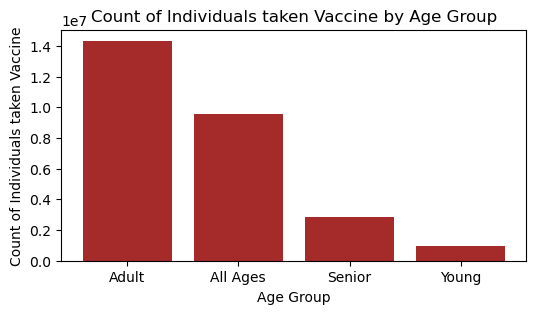

In [41]:
df0=df.groupby('AgeGroup')['count'].sum().reset_index()
df0=df0.sort_values(by='count', ascending=False)
plot.figure(figsize=(6, 3))
plot.bar(df0['AgeGroup'], df0['count'], color='brown')
plot.xlabel('Age Group')
plot.ylabel('Count of Individuals taken Vaccine')
plot.title('Count of Individuals taken Vaccine by Age Group')
plot.show() 

In [44]:
import plotly.express as px

In [53]:
df1=df.groupby('zip')['count'].sum().reset_index()
fig=px.bar(df1, x='zip', y='count', color='zip', title='The Distribution of Vaccine Counts by Zip Code')
fig.show()   